# Coefficient of determination

The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. 

In [2]:
import pandas as pd
import numpy as np
# Import the ols function
from statsmodels.formula.api import ols
ad_conversion = pd.read_csv("dataset/ad_conversion.csv")

# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = np.power(ad_conversion["n_impressions"] , 0.25)
ad_conversion["qdrt_n_clicks"] = np.power(ad_conversion["n_clicks"] , 0.25)

mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion, ci=None).fit()

In [3]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:22:22   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [4]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


# Residual standard error

Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

In [5]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mdl_click_vs_impression_orig.mse_resid)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mdl_click_vs_impression_trans.mse_resid)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478134
RSE of transformed model:  0.19690640896875722


# Residuals vs. fitted values

Here you can see diagnostic plots of residuals versus fitted values for two models on advertising conversion.

Original model (`n_clicks` versus `n_impressions`):

<center><img src="images/03.01.png"  style="width: 400px, height: 300px;"/></center>

Transformed model (`n_clicks ** 0.25` versus `n_impressions ** 0.25`):

<center><img src="images/03.02.png"  style="width: 400px, height: 300px;"/></center>

- The residuals track the `y=0` line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

# Q-Q plot of residuals

Here are normal Q-Q plots of the previous two models.

Original model (`n_clicks` versus `n_impressions`)

<center><img src="images/03.03.png"  style="width: 400px, height: 300px;"/></center>

Transformed model (`n_clicks ** 0.25` versus `n_impressions ** 0.25`):

<center><img src="images/03.04.png"  style="width: 400px, height: 300px;"/></center>

- The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

# Scale-location

Here are normal scale-location plots of the previous two models. That is, they show the size of residuals versus fitted values.

Original model (`n_clicks` versus `n_impressions`):

<center><img src="images/03.05.png"  style="width: 400px, height: 300px;"/></center>

Transformed model (`n_clicks ** 0.25` versus `n_impressions ** 0.25`):

<center><img src="images/03.06.png"  style="width: 400px, height: 300px;"/></center>


- The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

# Drawing diagnostic plots

It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

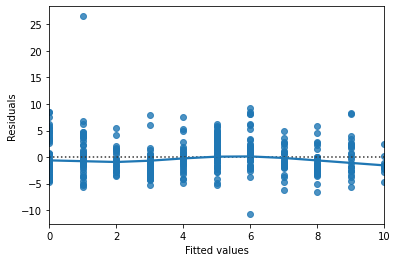

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
taiwan_real_estate = pd.read_csv("dataset/taiwan_real_estate2.csv")
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

In [12]:
# # Import qqplot
# from statsmodels.api import qqplot
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()
# # Create the Q-Q plot of the residuals
# qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# # Show the plot
# plt.show()

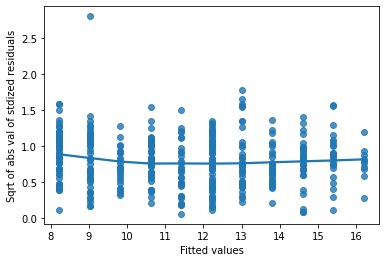

In [13]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

# Leverage

Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

Here, you'll look at highly leveraged values in the model of house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high leverage, then move the slider to find out.

Which statement is true?

<center><img src="images/03.07.png"  style="width: 400px, height: 300px;"/></center>


- Observations with a large distance to the nearest MRT station have the highest leverage, because most of the observations have a short distance, so long distances are more extreme.

# Influence

Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

You can see the same model as last time: house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high influence, then move the slider to find out.

Which statement is true?

<center><img src="images/03.08.png"  style="width: 400px, height: 300px;"/></center>


- Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.

# Extracting leverage and influence

In the last few exercises, you explored which observations had the highest leverage and influence. Now you'll extract those values from the model.

In [17]:
taiwan_real_estate.columns
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

In [18]:
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data = taiwan_real_estate).fit()
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values(["cooks_dist"],ascending = False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  
